<a href="https://colab.research.google.com/github/yjyjyjcho/graduation-paper_PNU/blob/master/Copy_of_%EC%9D%B4%EC%A0%A0_%EC%99%84%EC%84%B1_%EA%B1%B0%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## library import ##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import gc # for deleting unused variables


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# **train data 데이터 탐색**

In [ ]:
# data import #
experiment_result = pd.read_csv("train.csv", sep = '\t')

print(experiment_result.shape)
print("-----------------------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------------------")
print(experiment_result.info())


print("-----------------------------------------------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------------------------------------------")
print("\n")

print(experiment_result.columns)
print("-----------------------------------------------------------------------------------------------------------------------------------")
print(experiment_result.index)

(18, 1)
-----------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection  18 non-null     object
dtypes: object(1)
memory usage: 272.0+ bytes
None
-----------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------

In [ ]:
## data import ##
experiment_result = pd.read_csv("train.csv")
experiment_result = experiment_result.fillna('no') ## 결측치 -> no 로 처리 
experiment_result.head()


,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,no
4,5,wax,20,3.0,unworn,no,no


In [ ]:
experiment_result['feedrate'] = experiment_result['feedrate'].astype(int) # object형을 int로 변환
experiment_result.describe() #수치형 기초 통계량 확인

,No,feedrate,clamp_pressure
count,18.000000,18.000000,18.000000
mean,9.500000,9.722222,3.416667
std,5.338539,7.282578,0.624264
min,1.000000,3.000000,2.500000
25%,5.250000,3.000000,3.000000
50%,9.500000,6.000000,3.500000
75%,13.750000,18.750000,4.000000
max,18.000000,20.000000,4.000000


# **experiment_01 데이터 탐색**

In [ ]:
experiment_01 = pd.read_csv("experiment_01.csv")
print(experiment_01.columns)
experiment_01.head()


Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.0,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.6,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.3,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.3,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.3,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep


In [ ]:
print(experiment_01.shape)
print("-----------------------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------------------")
print(experiment_01.info())


print("-----------------------------------------------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------------------------------------------")
print("\n")

print(experiment_01.columns)
print("-----------------------------------------------------------------------------------------------------------------------------------")
print(experiment_01.index)

(1055, 48)
-----------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          1055 non-null   float64
 1   X1_ActualVelocity          1055 non-null   float64
 2   X1_ActualAcceleration      1055 non-null   float64
 3   X1_CommandPosition         1055 non-null   float64
 4   X1_CommandVelocity         1055 non-null   float64
 5   X1_CommandAcceleration     1055 non-null   float64
 6   X1_CurrentFeedback         1055 non-null   float64
 7   X1_DCBusVoltage            1055 non-null   float64
 8   X1_OutputCurrent           1055 non-null   float64
 9  

In [ ]:
experiment_01.describe()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.0,1055.0,1055.0,1055.0,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1.055000e+03,1055.000000,1.055000e+03,1055.00000,1055.000000,1055.000000,1055.0,1055.0,1055.000000,1055.000000
mean,151.998104,-0.514919,4.252891,151.999052,-0.516069,0.075188,-0.382762,0.081607,325.875829,10.755812,0.000845,87.943033,-0.796882,3.437441,87.939431,-0.769510,3.003876,-0.214612,0.079335,324.390521,9.327389,0.000866,30.477915,-0.629190,0.922701,30.473649,-0.621583,1.685309,0.0,0.0,0.0,0.0,31.673403,51.686190,1.571486,32.106483,51.607678,4.739336e-01,20.508831,9.017116e-01,320.18673,114.488227,0.171890,12.0,1.0,64.144076,8.669194
std,8.315984,5.875864,103.299534,8.309193,5.871274,81.316778,4.936649,0.030217,0.576857,6.354004,0.001224,13.364288,6.330471,74.119863,13.349370,6.332473,80.426778,5.256363,0.045752,0.610709,8.303259,0.001941,9.469046,8.748792,92.191459,9.436641,8.820857,84.766335,0.0,0.0,0.0,0.0,1099.305051,9.098133,33.929074,1099.302404,9.219512,6.871208e+00,5.509617,2.162504e-01,2.65724,20.408309,0.037033,0.0,0.0,39.669174,10.508312
min,141.000000,-18.100000,-1090.000000,141.000000,-17.900000,-922.000000,-17.000000,0.016300,322.000000,0.130000,-0.004810,72.400000,-32.700000,-756.000000,72.400000,-32.300000,-875.000000,-14.600000,0.013100,322.000000,0.163000,-0.000073,27.500000,-50.100000,-1170.000000,27.500000,-50.000000,-1000.000000,0.0,0.0,0.0,0.0,-2150.000000,-0.003250,-95.000000,-2150.000000,0.000000,-9.540000e-07,-0.694000,2.740000e-19,306.00000,0.000000,-0.000001,12.0,1.0,0.000000,6.000000
25%,145.000000,-5.690000,-37.500000,145.000000,-5.770000,0.000000,-4.940000,0.061900,326.000000,5.885000,0.000031,74.750000,-1.500000,-25.000000,74.750000,-1.665000,0.000000,-4.510000,0.037500,324.000000,3.110000,0.000000,27.500000,0.000000,0.000000,27.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,-741.500000,53.300000,-17.200000,-741.000000,53.300000,0.000000e+00,18.300000,8.375000e-01,318.00000,117.000000,0.159000,12.0,1.0,29.000000,6.000000
50%,151.000000,-0.050000,0.000000,151.000000,0.000000,0.000000,-1.100000,0.085800,326.000000,12.400000,0.000910,89.500000,0.000000,0.000000,89.500000,0.000000,0.000000,0.056200,0.078500,324.000000,7.670000,0.000231,28.500000,0.000000,0.000000,28.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,67.300000,53.300000,0.250000,67.700000,53.300000,0.000000e+00,21.000000,9.280000e-01,321.00000,118.000000,0.178000,12.0,1.0,65.000000,6.000000
75%,159.000000,4.140000,37.500000,159.000000,4.280000,0.000000,4.405000,0.099350,326.000000,14.000000,0.001180,99.800000,1.410000,25.000000,99.800000,1.665000,0.000000,4.025000,0.107000,325.000000,13.600000,0.001170,29.500000,0.000000,0.000000,29.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,768.500000,53.400000,24.000000,769.500000,53.300000,0.000000e+00,23.350000,9.950000e-0

# **EDA**

In [ ]:
# 1. Feature count

# 2. pairplot

# 3. heatmap


In [ ]:
print("##########################")
print("##### Feature Counts #####")
print("##########################")
for i in range(1, len(experiment_result.columns)):
    print("####### " + experiment_result.columns[i] + " #######")
    print(experiment_result.iloc[:,i].value_counts())

##########################
##### Feature Counts #####
##########################
####### material #######
wax    18
Name: material, dtype: int64
####### feedrate #######
3     6
20    5
6     5
15    1
12    1
Name: feedrate, dtype: int64
####### clamp_pressure #######
4.0    9
3.0    6
2.5    3
Name: clamp_pressure, dtype: int64
####### tool_condition #######
worn      10
unworn     8
Name: tool_condition, dtype: int64
####### machining_finalized #######
yes    14
no      4
Name: machining_finalized, dtype: int64
####### passed_visual_inspection #######
yes    10
no      8
Name: passed_visual_inspection, dtype: int64


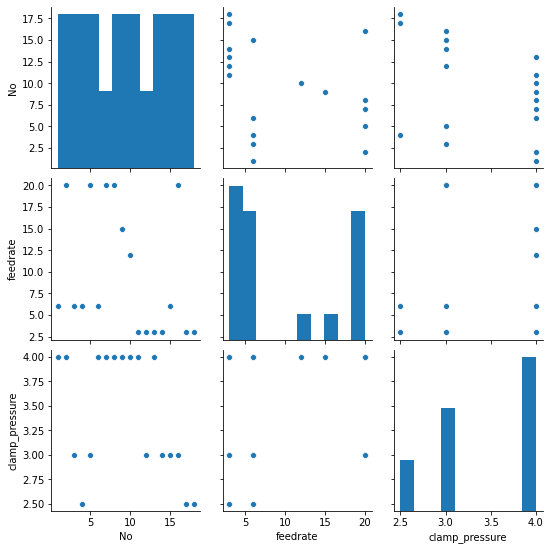

In [ ]:
sns.pairplot(data = experiment_result)

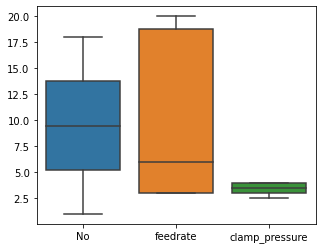

In [ ]:
sns.boxplot(data = experiment_result)

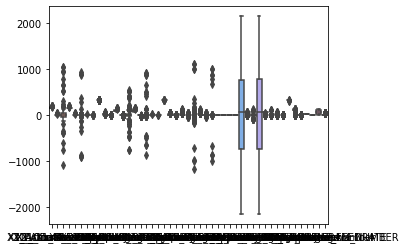

In [ ]:
sns.boxplot(data = experiment_01)

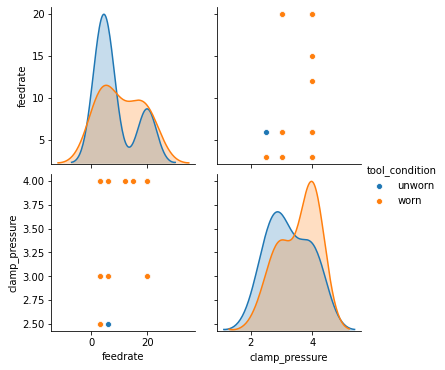

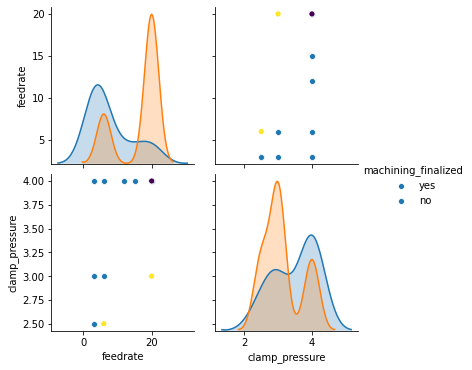

In [ ]:
sns.pairplot(experiment_result, hue='tool_condition', vars=["feedrate","clamp_pressure"])
sns.pairplot(experiment_result, hue='machining_finalized', vars=["feedrate","clamp_pressure"])

In [ ]:
print("##########################")
print("##### Feature Counts #####")
print("##########################")
for i in ['Machining_Process','M1_CURRENT_PROGRAM_NUMBER','M1_sequence_number','M1_CURRENT_FEEDRATE']:
    print("####### " + i + " #######")
    print(experiment_01[i].value_counts())

##########################
##### Feature Counts #####
##########################
####### Machining_Process #######
Layer 2 Up       203
Layer 3 Up       194
Layer 1 Up       172
Layer 1 Down     148
Layer 3 Down     142
Layer 2 Down     132
Prep              30
Repositioning     25
end                8
Starting           1
Name: Machining_Process, dtype: int64
####### M1_CURRENT_PROGRAM_NUMBER #######
1.0    1055
Name: M1_CURRENT_PROGRAM_NUMBER, dtype: int64
####### M1_sequence_number #######
2.0      102
70.0      30
111.0     30
45.0      29
29.0      29
        ... 
12.0       1
51.0       1
44.0       1
4.0        1
0.0        1
Name: M1_sequence_number, Length: 81, dtype: int64
####### M1_CURRENT_FEEDRATE #######
6.0     991
50.0     64
Name: M1_CURRENT_FEEDRATE, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

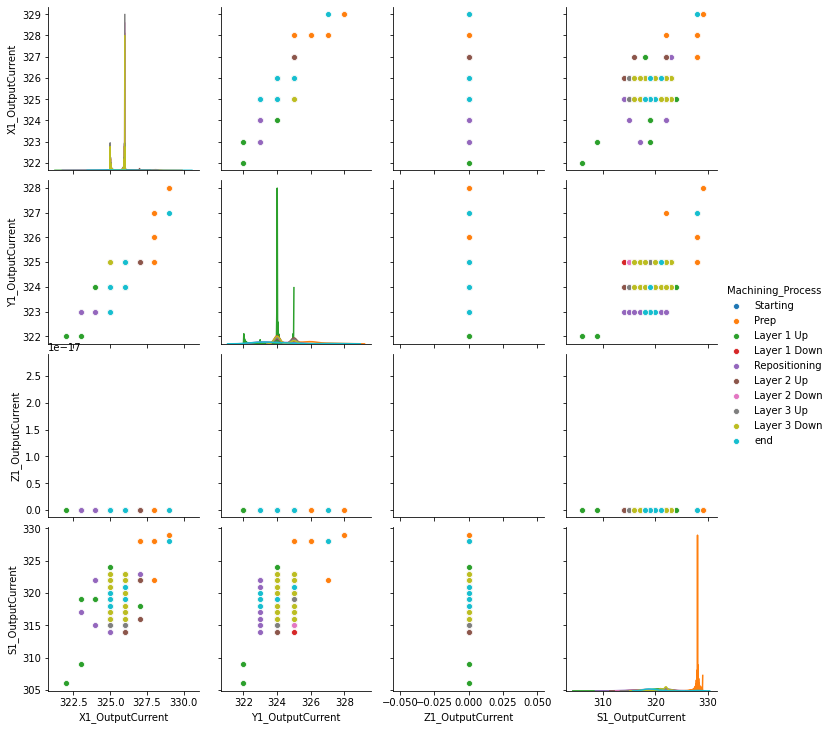

In [ ]:
sns.pairplot(experiment_01, hue='Machining_Process', vars=['X1_OutputCurrent', 'Y1_OutputCurrent', 'Z1_OutputCurrent','S1_OutputCurrent']) # 가공마무리&전류 관계
sns.pairplot(experiment_01, hue='Machining_Process', vars=['X1_OutputVoltage', 'Y1_OutputVoltage', 'Z1_OutputVoltage','S1_OutputVoltage']) # 가공마무리&전압 관계
sns.pairplot(experiment_01, hue='Machining_Process', vars=['X1_OutputPower','S1_OutputPower']) # 가공마무리&출력동력 관계

소결론 : 가공마무리 & 전류 상관관계가 가장 높음

# **Data frame**

In [ ]:
experiment_result.astype({'feedrate':'int'}).dtypes


In [ ]:
#########creating data frame#################

frames = list()
experiment_result.astype({'feedrate':'int'}).dtypes
#load files
for i in range(1,19):
    exp_number = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("experiment_{}.csv".format(exp_number))

#load each experiment result
    row = experiment_result[experiment_result['No'] == i] #행번호 붙이기

#add experiment settings to features (feedrate, clamp pressure 데이터 붙이기)
    frame['feedrate']=row.iloc[0]['feedrate'] 
    frame.astype({'feedrate':'int'}).dtypes
    frame['clamp_pressure']=row.iloc[0]['clamp_pressure']
    
# Having label as 'tool_conidtion'
    
    frame['label'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0 #마모 : 1, 미마모 : 0 라벨링 -> like 원핫인코딩
    frames.append(frame)

#encode 'Machining_Process'label to number #공작과정 라벨링
 
#split df into train/test data

#fit  & predict

df = pd.concat(frames, ignore_index = True)
df.head()
df.astype({'feedrate':'int'}).dtypes
df['feedrate'].astype('float')
pd.to_numeric(df['feedrate'])

In [ ]:
df.shape

In [ ]:
df.info()

# **Heat map**

In [ ]:
# Convert 'Machining_process' into numerical values
pro={'Layer 1 Up':1,'Repositioning':2,'Layer 2 Up':3,'Layer 2 Up':4,'Layer 1 Down':5,'End':6,'Layer 2 Down':7,'Layer 3 Down':8,'Prep':9,'end':10,'Starting':11}

data=[df]

for dataset in data:
    dataset['Machining_Process']=dataset['Machining_Process'].map(pro)

df=df.drop(['Z1_CurrentFeedback','Z1_DCBusVoltage','Z1_OutputCurrent','Z1_OutputVoltage','S1_SystemInertia'],axis=1)

corm=df.corr()
corm

In [ ]:
#checking the relationship between the variables by applying the correlation 
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True)

In [ ]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

# **모델링**

In [ ]:
## building ML model ##

X=df.drop(columns=['label','Machining_Process'],axis=1) #공작과정 삭제
Y=np.array(df['label'])
print('The dimension of X table is: ',X.shape,'\n')
print('The dimension of Y table is: ', Y.shape)

In [ ]:
df.astype({'feedrate':'int'}).dtypes
df['feedrate'].astype('float')
pd.to_numeric(df['feedrate'])
df['feedrate'] = df['feedrate'].astype(int) # object형을 int로 변환

In [ ]:
df.info()

In [ ]:
## train/test split ##
from sklearn.model_selection import train_test_split

#divided into testing and training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# **Random forest**

In [ ]:
## random forest ##
%%time
rmf_model=RandomForestClassifier()
rmf_model.fit(x_train,y_train)

In [ ]:
y_score = rmf_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [ ]:
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(rmf_model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

In [ ]:
"""
#learning curve
train_sizes = [18964]
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)
"""

In [ ]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

# **Logistic regression**

In [ ]:
## logistic regression ##

%%time
import sklearn.linear_model as lm
logreg = lm.LogisticRegression()

logreg=LogisticRegression()
logreg.fit(x_train,y_train)

In [ ]:
y_score = logreg.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [ ]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

In [ ]:
"""
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(logreg.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))
"""

# **KNN**

In [ ]:
## KNN(K nearest neighbor)
%%time
knb_model=KNeighborsClassifier()
knb_model.fit(x_train,y_train)

In [ ]:
y_score = knb_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [ ]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

In [ ]:
"""
# Feature importances

#importances = CV_RFR_regr.best_estimator_.feature_importances_

features = [(df.columns[i], v) for i,v in enumerate(knb_model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in enumerate(features[:10]):
    print("{0}: {1:0.4f}".format(item[0], item[1]))
"""

In [ ]:
train_scores = []
test_scores = []

for i in range(1,31):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)

    score1 = model.score(x_train, y_train)
    score2 = model.score(x_test, y_test)
    
    train_scores.append(score1)
    test_scores.append(score2)
    
plt.plot(range(1,31),train_scores,'bo-',label='train scores')
plt.plot(range(1,31),test_scores,'r*-',label='test scores')
plt.ylim(0.8,1.)
plt.legend(loc='lower center')

# **Decision tree**

In [ ]:
%%time
DTC_model= DecisionTreeClassifier()
DTC_model.fit(x_train,y_train)

In [ ]:
y_score = DTC_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [ ]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

In [ ]:
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(DTC_model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

In [ ]:
from sklearn.tree import convert_to_graphviz
import graphviz

graphviz.Source(export_graphviz(tree))

# **Decision tree2**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
frames = list()
results = pd.read_csv("train.csv")
for i in range(1,19):
    exp = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("experiment_{}.csv".format(exp))
    row = results[results['No'] == i]
    frame['target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    frames.append(frame)
df = pd.concat(frames, ignore_index = True)
df.head()
# Transform process name in number
le = LabelEncoder()
le.fit(df['Machining_Process'])
df['Machining_Process'] = le.transform(df['Machining_Process'])
# Create np arrays and split train/test sets
y = np.array(df['target'])
x = df.drop('target', axis=1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)
# Target distribution (count values)
print("Target distribution - 1 worn; 0 unworn:")
print(df['target'].value_counts())



In [ ]:
%%time
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_score = model.predict(x_test)

In [ ]:

print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))


In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [ ]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

In [ ]:
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

In [ ]:
from sklearn.tree import convert_to_graphviz
import graphviz

graphviz.Source(export_graphviz(tree))

# **SGD**

In [ ]:
## SGD ##
%%time
sgd_model=SGDClassifier()
sgd_model.fit(x_train,y_train)

In [ ]:
y_score = sgd_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [ ]:
"""
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(sgd_model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))
"""

In [ ]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

# Linear **SVM**

In [ ]:
## Linear SVM ##
%%time
svm_model=LinearSVC()
svm_model.fit(x_train,y_train)

In [ ]:
y_score = svm_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [ ]:
"""
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(svm_model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))
"""

In [ ]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

# **lGBM**

In [ ]:

#LGBM #
%%time
LGBM = LGBMClassifier()
LGBM.fit(x_train,y_train)

In [ ]:

y_score = LGBM.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

In [ ]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [ ]:
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(LGBM.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

In [ ]:

import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

# **XgBoost-public**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

#Creating Test Train Splits


X_train,X_test,y_train,y_test =train_test_split(x,y,train_size=0.8,random_state=100)

In [ ]:
%%time
#XgBoost
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

In [ ]:
y_score = xgb_model.predict(X_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(X_train), len(X_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

In [ ]:
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(xgb_model.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

In [ ]:
import time
start = time.time()  # 시작 시간 저장
 
 
# 작업 코드
 
 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

# **ACC score**

In [ ]:
## which is the best model ##
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Stochastic Gradient Decent'],
    'Acc': [acc_svm_model, acc_knb_model, acc_log_reg, 
              acc_rmf_model,acc_sgd_model]
    })

result_df = results.sort_values(by='Acc', ascending=False)
result_df = result_df.set_index('Acc')
result_df